# Course Project: Interview Preparation (Data Science- PGC, InternshalaTrainings)
## Problem Statement: Create a Machine Learning model using various ClassificationModels to predict rainfall.

# Introduction

In this project, I am tasked with creating a Machine Learning model to predict rainfall in Sydney using various Classification Models, including Decision Trees and Ensemble methods. The project is part of my Interview Preparation for the Data Science Professional Certification offered by Internshala Trainings.

## Problem Statement

The Daily Buzz, a prominent newspaper company in Sydney, aims to enhance the accuracy of their weather predictions published in a new column called 'The Weather Oracle.' To achieve this, they have hired me as a Machine Learning expert to build a model that predicts rainfall accurately.

## Approach

My approach involves loading the weather data of Sydney from 2008 to 2017, performing data preprocessing, and employing different Classification Models, such as Decision Trees, Bagging, and Boosting techniques, including the Random Forest Classifier. I will compare the accuracy of each model, create a confusion matrix to evaluate their performance, and select the best-performing model for further analysis.


# Importing Libraries

To embark on our data science journey, we leverage the power of Python and some of its indispensable libraries:

1. **pandas:** Python owes much of its popularity in data science to pandas, which provides high-performance, easy-to-use data structures and data analysis tools. Its DataFrame is particularly valuable for handling structured data.

2. **numpy:** The fundamental package for scientific computing with Python. It offers support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

3. **matplotlib:** A plotting library that produces static, animated, and interactive visualizations. It is an essential tool for data exploration and presentation.

4. **seaborn:** Built on top of matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the creation of aesthetically pleasing visualizations.

5. **scikit-learn:** This machine learning library is a go-to resource for data scientists. It includes various tools for classification, regression, clustering, and more, making it a comprehensive solution for developing predictive data analysis models.

These libraries collectively empower us to efficiently manipulate, analyze, and visualize data, laying the foundation for successful machine learning endeavors.


In [690]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data Collection

In [691]:
df = pd.read_excel('G:/PYTHON/sydney_rain prediction.xlsx', header =0)
# here importing main case study file into data frame df

In [692]:
df.head()
#The head() method in pandas is used to display the first 5 rows of a DataFrame by default

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [693]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [694]:
df.info()
# in Pandas provides a concise summary of the DataFrame,
#including information about the data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

**Observations:**

**Good:**
- The 'Date' column is appropriately represented as datetime64, capturing the temporal aspect of the data.
- 'Location' is a categorical variable, and there are no missing values.
- 'RainTomorrow' is the target variable, and it has no missing values.
- The data types of numeric columns seem appropriate (float64).

**Areas of Improvement:**
- Various columns have missing values, and the count of missing values varies across columns.
- Numeric columns with missing values: 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'.
- 'RainToday' has missing values, and it is represented as an object. It may need encoding for modeling.

**Recommendations:**
- Handle missing values in numeric columns through imputation.
- Consider encoding categorical variables like 'RainToday' for modeling.
- Check for outliers or anomalies in numeric columns.
- Further exploration and statistical analysis may be needed to understand data distributions and relationships.

Addressing these areas of improvement during data preprocessing will contribute to building a robust machine learning model.


# Data Preprocessing

### creating dummy variable
Dummy variables are created to represent categorical data numerically, enabling machine learning models to process and analyze such data effectively.

In [695]:
df = pd.get_dummies(df,drop_first=True)

In [696]:
# Change the data type of 'RainToday' and 'RainTomorrow' columns to integer
df['RainToday_Yes'] = df['RainToday_Yes'].astype(int)
df['RainTomorrow_Yes'] = df['RainTomorrow_Yes'].astype(int)


In [697]:
# Missing Value treatment
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)


In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   MaxTemp           3337 non-null   float64       
 3   Rainfall          3337 non-null   float64       
 4   Evaporation       3337 non-null   float64       
 5   Sunshine          3337 non-null   float64       
 6   Humidity9am       3337 non-null   float64       
 7   Humidity3pm       3337 non-null   float64       
 8   Pressure9am       3337 non-null   float64       
 9   Pressure3pm       3337 non-null   float64       
 10  Cloud9am          3337 non-null   float64       
 11  Cloud3pm          3337 non-null   float64       
 12  Temp9am           3337 non-null   float64       
 13  Temp3pm           3337 non-null   float64       
 14  RainToday_Yes     3337 n

In [699]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


## Describe Function

The `describe` function is a statistical summary tool commonly used in data analysis libraries such as Pandas in Python. It provides key statistics for each numerical column in a dataset, including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values. This function offers a quick overview of the central tendency, dispersion, and shape of the distribution of a dataset.

## EDD (Exploratory Data Analysis)

Exploratory Data Analysis (EDD) is an essential preliminary step in data analysis. It involves techniques such as data visualization, summary statistics, and outlier detection to gain insights into the main characteristics of a dataset. EDD helps identify patterns, trends, and potential issues within the data, guiding subsequent analysis and modeling decisions.


In [700]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.324243,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000
std,NaN,4.551593,4.493290,9.887277,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269


## checking outlier using boxplot

## Boxplot

A **boxplot**, also known as a *box-and-whisker plot*, is a graphical representation of the distribution of a dataset. It provides a visual summary of the central tendency, spread, and skewness of the data. The box in the plot represents the interquartile range (IQR) – the range between the first quartile (Q1) and the third quartile (Q3). The line inside the box denotes the median.

### Outlier Detection

Boxplots are particularly useful for identifying outliers in a dataset. Outliers, which are values significantly different from the majority, are often displayed as individual points beyond the "whiskers" of the boxplot. This visual representation makes it easy to spot values that may require further investigation due to their deviation from the overall distribution of the data.

Use of boxplots is common in exploratory data analysis to quickly assess the distribution and presence of outliers in a dataset.


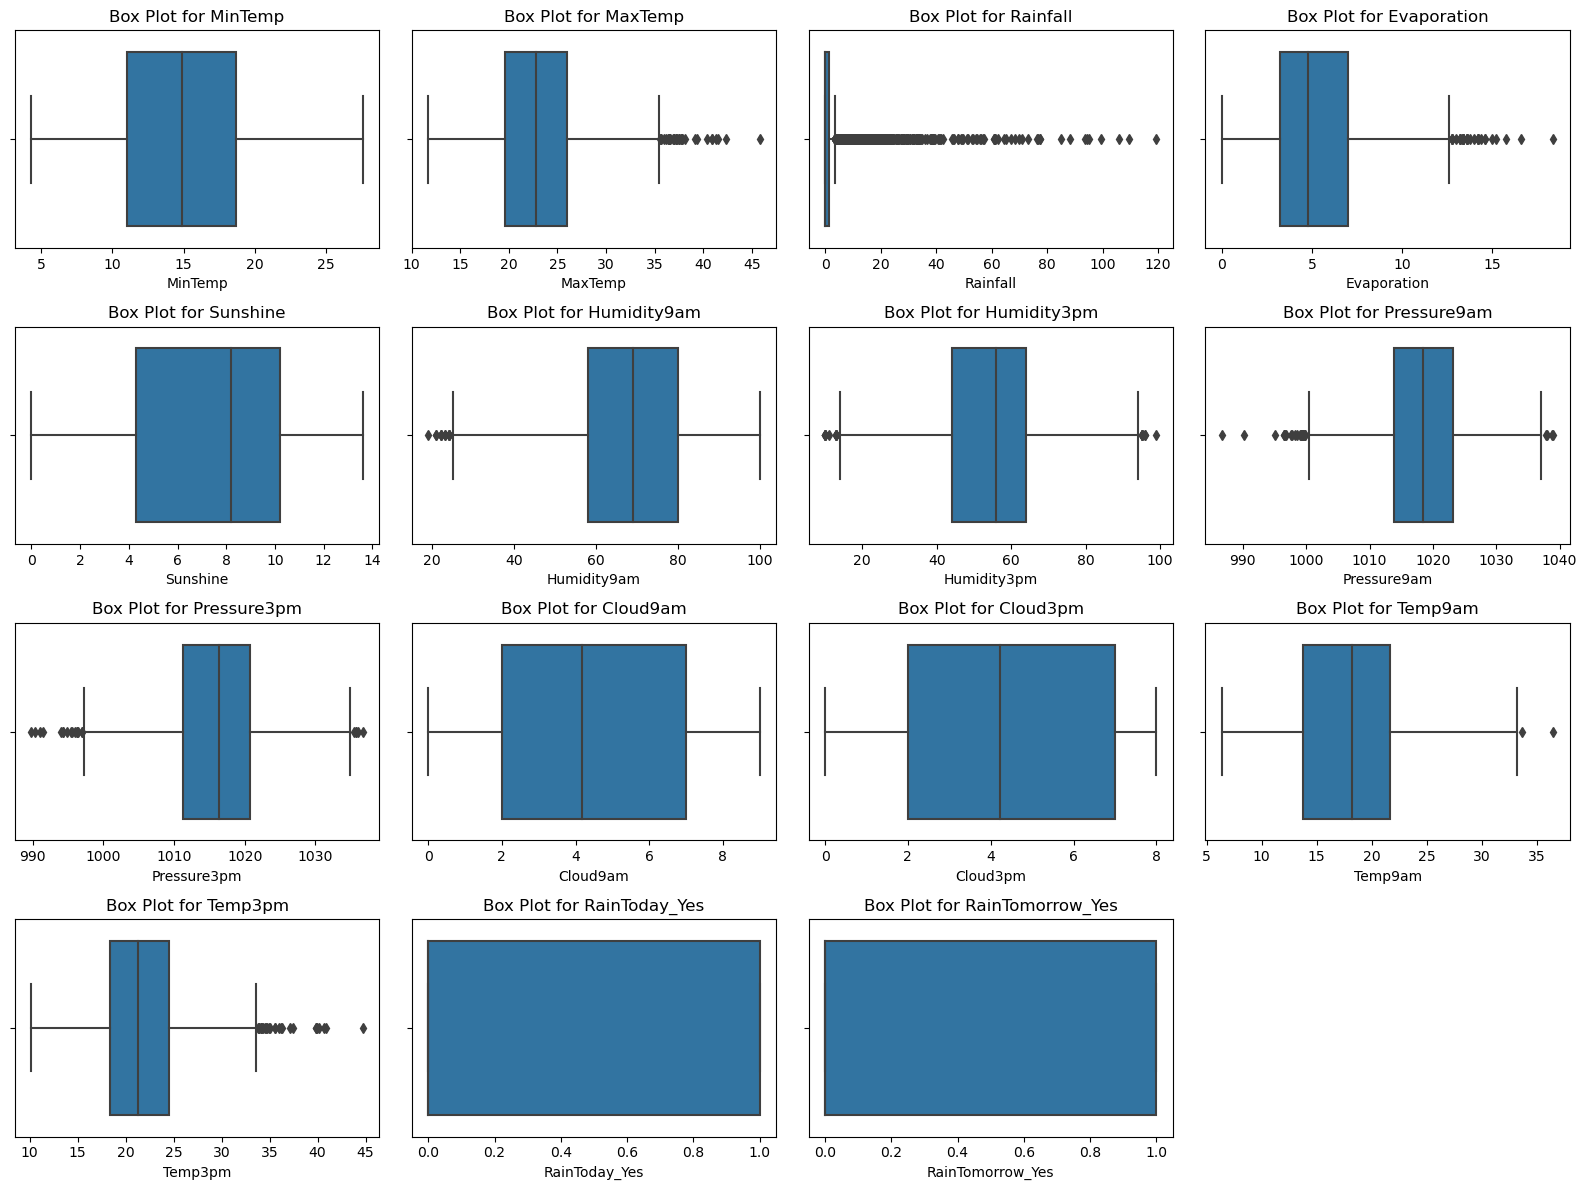

In [701]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create a figure with a specified size
plt.figure(figsize=(16, 12))

# Iterate through numeric columns for individual box plots
for i, col in enumerate(numeric_cols, 1):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i)
    
    # Create a box plot for the current numeric column
    sns.boxplot(x=df[col])
    
    # Set the title for the box plot
    plt.title(f'Box Plot for {col}')

# Adjust layout for better visualization
plt.tight_layout()

# Display the box plots
plt.show()


## IQR Method for Outlier Treatment

The **Interquartile Range (IQR)** method is a statistical technique used to identify and treat outliers in a dataset. The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3). Outliers are identified as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

### Steps for Outlier Treatment using IQR Method:

1. **Calculate the IQR:**

    ```python
    IQR = Q3 - Q1
    ```

2. **Identify Outliers:**

    ```python
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['column'] < lower_bound) | (data['column'] > upper_bound)]
    ```

3. **Treatment of Outliers:**

    - **Removing Outliers:**
    
        ```python
        data_no_outliers = data[(data['column'] >= lower_bound) & (data['column'] <= upper_bound)]
        ```

    - **Transforming Outliers:**
    
        Apply a mathematical transformation to reduce the impact of outliers.

    - **Imputing Values:**
    
        Replace outliers with a meaningful substitute based on the context.


In [702]:
q1 = df['MaxTemp'].quantile(0.25)
q3 = df['MaxTemp'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['MaxTemp'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['MaxTemp'] = df['MaxTemp'].clip(lower=ll, upper=ul)


upper limit: 35.599999999999994
lower limit: 10.000000000000004


In [703]:
q1 = df['Rainfall'].quantile(0.25)
q3 = df['Rainfall'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Rainfall'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Rainfall'] = df['Rainfall'].clip(lower=ll, upper=ul)


upper limit: 3.4999999999999996
lower limit: -2.0999999999999996


In [704]:
q1 = df['Evaporation'].quantile(0.25)
q3 = df['Evaporation'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Evaporation'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Evaporation'] = df['Evaporation'].clip(lower=ll, upper=ul)


upper limit: 12.7
lower limit: -2.499999999999999


In [705]:
q1 = df['Humidity9am'].quantile(0.25)
q3 = df['Humidity9am'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Humidity9am'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Humidity9am'] = df['Humidity9am'].clip(lower=ll, upper=ul)


upper limit: 113.0
lower limit: 25.0


In [706]:
q1 = df['Humidity3pm'].quantile(0.25)
q3 = df['Humidity3pm'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Humidity3pm'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Humidity3pm'] = df['Humidity3pm'].clip(lower=ll, upper=ul)


upper limit: 94.0
lower limit: 14.0


In [707]:
q1 = df['Pressure9am'].quantile(0.25)
q3 = df['Pressure9am'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Pressure9am'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Pressure9am'] = df['Pressure9am'].clip(lower=ll, upper=ul)


upper limit: 1037.0500000000002
lower limit: 999.8499999999999


In [708]:
q1 = df['Pressure3pm'].quantile(0.25)
q3 = df['Pressure3pm'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Pressure3pm'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Pressure3pm'] = df['Pressure3pm'].clip(lower=ll, upper=ul)


upper limit: 1035.05
lower limit: 997.05


In [709]:
q1 = df['Temp9am'].quantile(0.25)
q3 = df['Temp9am'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Temp9am'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Temp9am'] = df['Temp9am'].clip(lower=ll, upper=ul)


upper limit: 33.55
lower limit: 1.9500000000000028


In [710]:
q1 = df['Temp3pm'].quantile(0.25)
q3 = df['Temp3pm'].quantile(0.75)
# or
# Q1, Q3 = np.percentile(df['Temp3pm'], [25, 75])

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower limits
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
print("upper limit:",ul)
print("lower limit:",ll)


# Cap values within the specified range
df['Temp3pm'] = df['Temp3pm'].clip(lower=ll, upper=ul)


upper limit: 33.650000000000006
lower limit: 9.249999999999996


## After treating all the outliers lets confirm with the boxplot

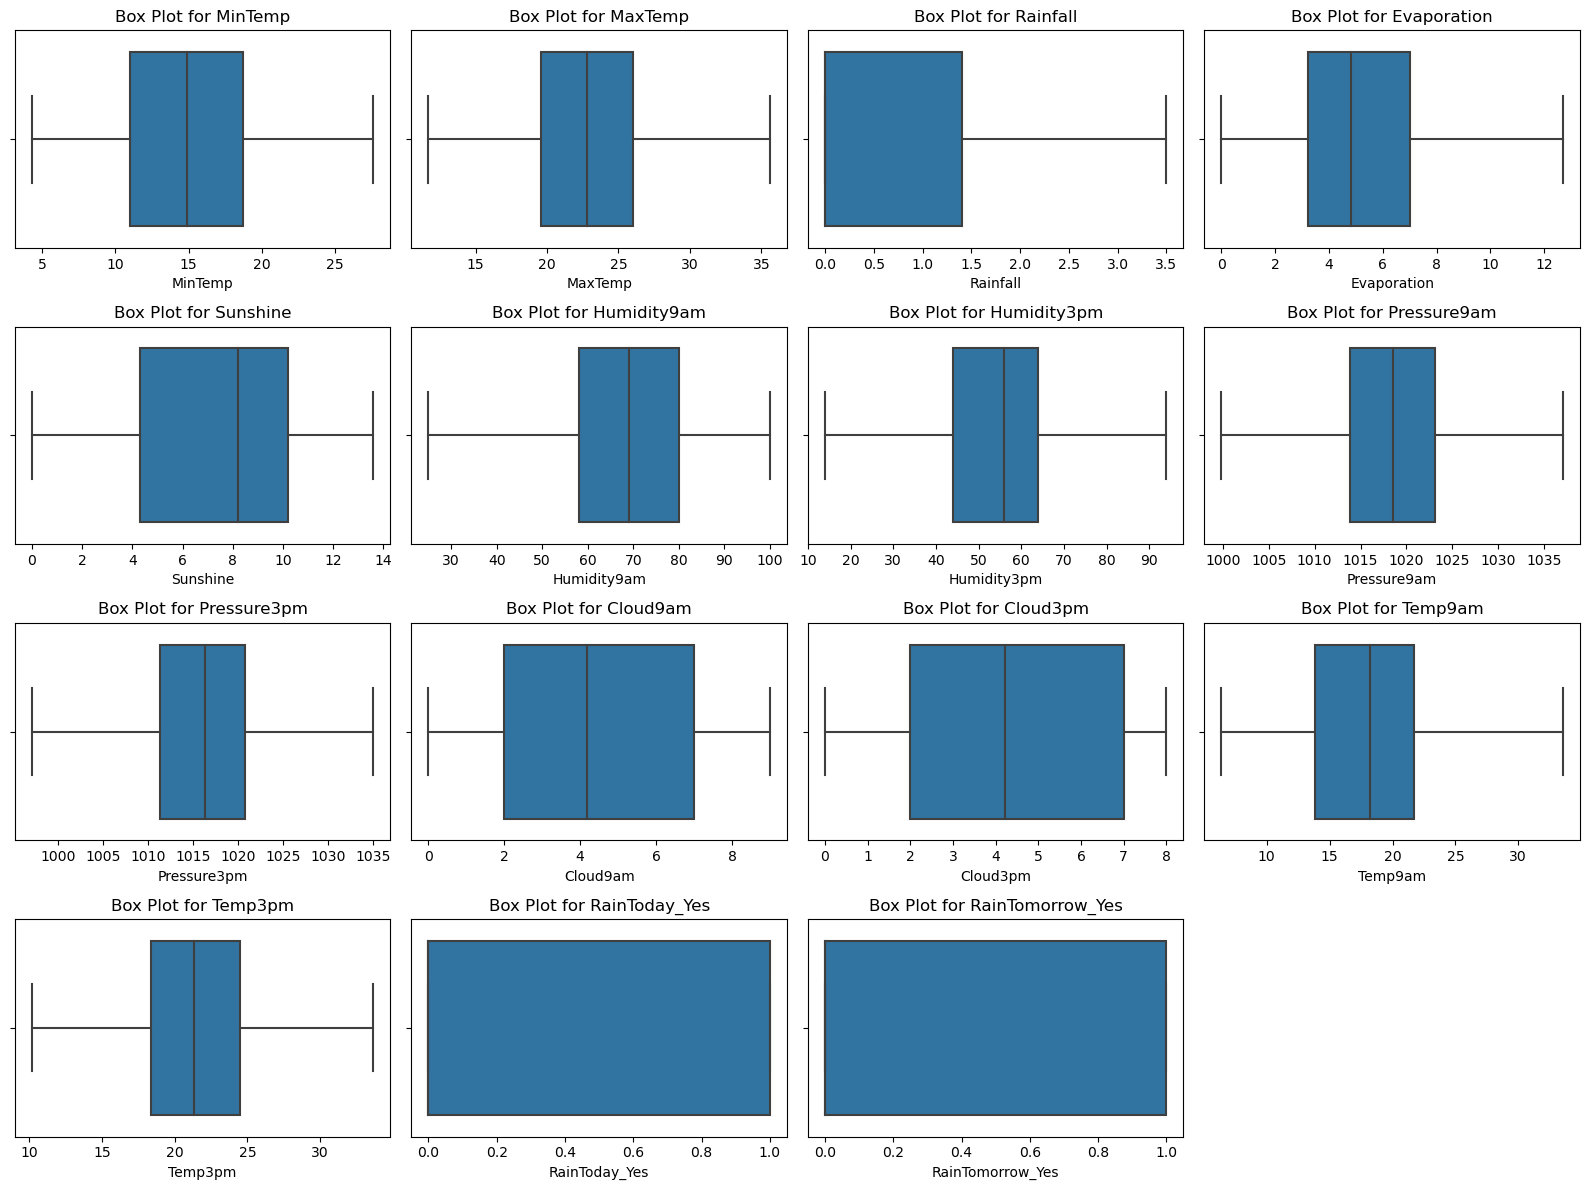

In [711]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

## Class Imbalance

**Description:**
Class imbalance occurs in a classification problem when there is a significant disparity in the number of instances between different classes. One class may have notably fewer instances than another, creating an imbalance in the dataset. This situation can pose challenges for machine learning models, leading to biased predictions in favor of the majority class and poorer performance on the minority class.

### How to Check Class Imbalance

**Counting Instances:**
- Method: Count the number of instances for each class in your dataset.

**Visualizations:**
- Method: Use bar charts or pie charts to visually represent the distribution of classes.

**Summary Statistics:**
- Method: Calculate and compare the frequencies or proportions of each class.

### How to Treat Class Imbalance

Addressing class imbalance is crucial for building robust models. Several techniques can be employed:

1. **Resampling:**
   - **Oversampling:**
     - Method: Increase the number of instances in the minority class.
     - Purpose: Balances class distribution by duplicating minority class instances.

   - **Undersampling:**
     - Method: Decrease the number of instances in the majority class.
     - Purpose: Balances class distribution by removing instances from the majority class.

2. **Synthetic Data Generation:**
   - Method: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic instances for the minority class.
   - Purpose: Augments the minority class with synthetic data points to improve its representation.

3. **Different Algorithms:**
   - Method: Explore algorithms that are less sensitive to class imbalance, such as ensemble methods (e.g., Random Forests) or algorithmic techniques like XGBoost.
   - Purpose: Utilizes algorithms that inherently handle imbalanced datasets, reducing the need for explicit balancing techniques.

_In this discussion, we emphasized the use of the oversampling technique for addressing class imbalance._


<Axes: xlabel='RainToday_Yes', ylabel='count'>

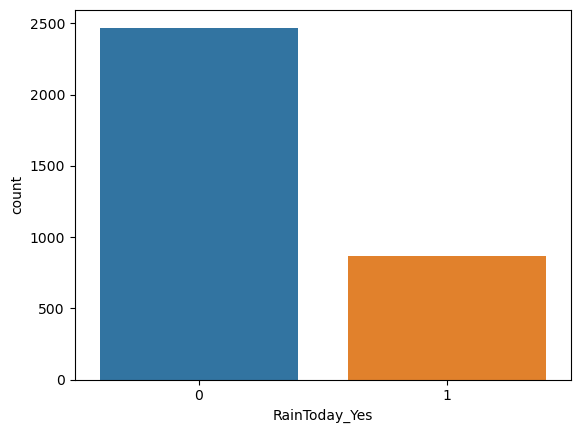

In [712]:
sns.countplot(x='RainToday_Yes',data=df)

<Axes: xlabel='RainTomorrow_Yes', ylabel='count'>

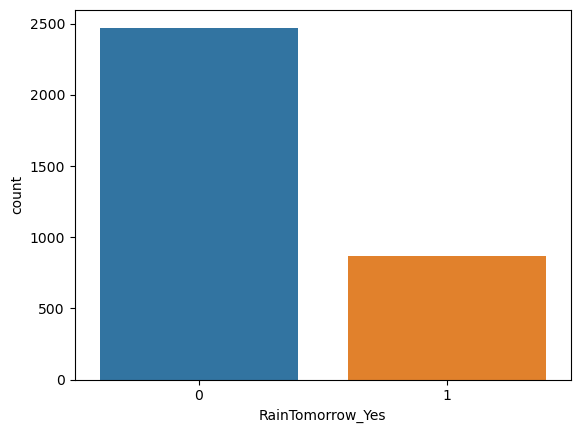

In [713]:
sns.countplot(x='RainTomorrow_Yes',data=df)

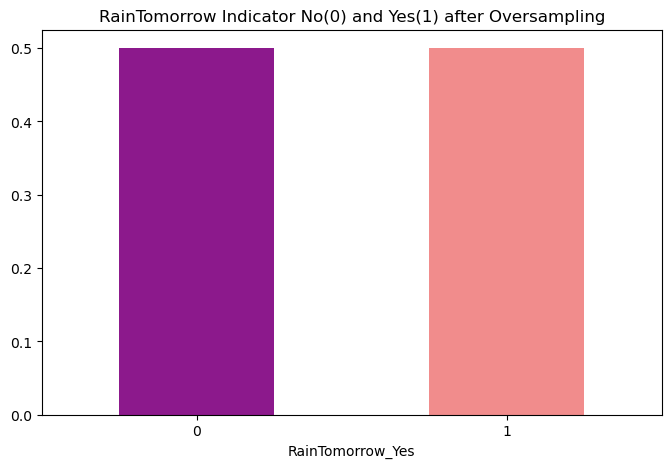

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define custom colors for the plot
colors = ['purple', 'lightcoral']

# Separate data into 'No' and 'Yes' classes for 'RainTomorrow_Yes'
no = df[df.RainTomorrow_Yes == 0]
yes = df[df.RainTomorrow_Yes == 1]

# Perform random oversampling of the 'Yes' class to balance the class distribution
# replace=True allows sampling with replacement, n_samples=len(no) matches the size of the 'No' class
# random_state=123 sets a fixed random seed for reproducibility
yes_oversampled = yes.sample(n=len(no), replace=True, random_state=123)

# Combine the oversampled 'Yes' class with the 'No' class
df = pd.concat([no, yes_oversampled])

# Create a bar plot to visualize the distribution of 'RainTomorrow_Yes' classes after oversampling
fig = plt.figure(figsize=(8, 5))
df.RainTomorrow_Yes.value_counts(normalize=True).plot(kind='bar', color=colors, alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling')
plt.show()


 # Model Selection

## Creating x and y variables


In [715]:
x = df.drop(['RainTomorrow_Yes', 'Date'], axis=1)
y = df[['RainTomorrow_Yes']]
#The drop function in pandas is used to remove specified rows or columns from a DataFrame,
#providing a modified DataFrame without altering the original.
#Separate the data into independent variables and dependent variables.

In [716]:
from sklearn.model_selection import train_test_split#Splitting the data into training and testing sets
# with 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Shape of Y_test:", y_test.shape)
print("Shape of X_train:", x_train.shape)

Shape of Y_test: (989, 1)
Shape of X_train: (3955, 14)


# Logistic Regression

**Description:**
Logistic Regression is a statistical method used for binary classification problems. Despite its name, it is used for predicting the probability of an instance belonging to a particular class. The logistic function (sigmoid function) is employed to map the predicted values to probabilities between 0 and 1.

**Advantages:**

1. **Simple and Interpretable:**
   - *Explanation:* Logistic Regression provides a straightforward and interpretable way to understand the relationship between features and the probability of belonging to a certain class.

2. **Efficient for Small Datasets:**
   - *Explanation:* Logistic Regression can perform well even with relatively small datasets, making it suitable for scenarios where data availability is limited.

3. **Probabilistic Output:**
   - *Explanation:* The model outputs probabilities, allowing users to set different decision thresholds based on their specific requirements.

4. **Low Variance:**
   - *Explanation:* Logistic Regression is less prone to overfitting when compared to more complex models, especially when the number of features is small.

5. **Well-Suited for Linearly Separable Data:**
   - *Explanation:* Logistic Regression performs well when the decision boundary is approximately linear, making it suitable for linearly separable data.

_In summary, Logistic Regression is a versatile and efficient algorithm, particularly beneficial for binary classification tasks with interpretable results, smaller datasets, and well-behaved linearly separable data._


In [717]:
from sklearn.linear_model import LogisticRegression

#LogisticRegression model having random_state=0 for reproducibility
clf_lr = LogisticRegression(random_state=0)

# Fitting the model to the train data
clf_lr.fit(x_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [718]:
#now predict value of y using this model
y_pred = clf_lr.predict(x_test)

In [719]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

### Metrics for Model Evaluation

- **Accuracy Score:**
  - Measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total instances.
  - Formula: \(\frac{{\text{{True Positives}} + \text{{True Negatives}}}}{{\text{{Total Instances}}}}\)
  - Higher accuracy indicates better performance, but it may not be suitable for imbalanced datasets.

- **Precision Score:**
  - Measures the accuracy of the positive predictions made by the model.
  - Formula: \(\frac{{\text{{True Positives}}}}{{\text{{True Positives}} + \text{{False Positives}}}}\)
  - High precision means fewer false positives, which is crucial when the cost of false positives is high.

- **Recall (Sensitivity or True Positive Rate):**
  - Measures the ability of the model to capture all the positive instances.
  - Formula: \(\frac{{\text{{True Positives}}}}{{\text{{True Positives}} + \text{{False Negatives}}}}\)
  - High recall indicates the model is good at identifying positive instances, important when false negatives are costly.

- **Confusion Matrix:**
  - A table showing the true positive, true negative, false positive, and false negative counts.
  - Helps visualize the performance of a classification algorithm.
  - Useful for understanding the distribution of model predictions.

### Interpretation:
- **High Accuracy:** Generally, a higher accuracy score is desirable, but it may not be sufficient for evaluating model performance, especially in imbalanced datasets.
- **Balanced Precision and Recall:** Strive for a balance between precision and recall, depending on the problem context and the associated costs of false positives and false negatives.
- **Confusion Matrix:** Provides a detailed breakdown of model performance, helping to identify specific areas where the model excels or struggles.

These metrics collectively contribute to a comprehensive assessment of the model's effectiveness in making accurate predictions.


In [720]:
# model evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
precision_score_lr = precision_score(y_test, y_pred)
recall_score_lr = recall_score(y_test, y_pred)
confusoinmatrix =confusion_matrix(y_test, y_pred)
roc_aucscore = roc_auc_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy score for logistic regression:", accuracy_lr)
print("Precision score for logistic regression:", precision_score_lr)
print("Recall score for logistic regression:", recall_score_lr)
print("roc_auc score:",roc_aucscore)
print("confusion matrix:",confusoinmatrix)
print("classification report:",classification_report(y_test,y_pred))

Accuracy score for logistic regression: 0.775530839231547
Precision score for logistic regression: 0.7800829875518672
Recall score for logistic regression: 0.7642276422764228
roc_auc score: 0.7754739821040061
confusion matrix: [[391 106]
 [116 376]]
classification report:               precision    recall  f1-score   support

           0       0.77      0.79      0.78       497
           1       0.78      0.76      0.77       492

    accuracy                           0.78       989
   macro avg       0.78      0.78      0.78       989
weighted avg       0.78      0.78      0.78       989



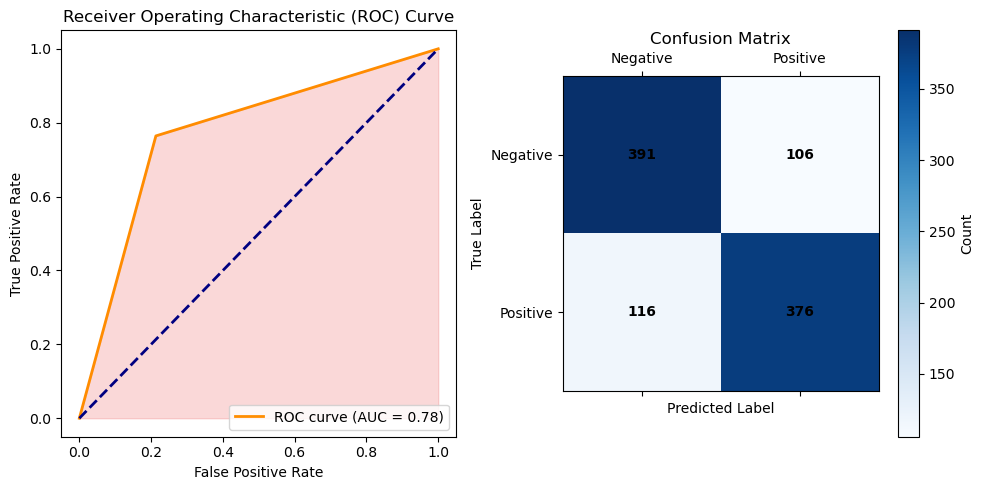

roc_auc score: 0.7754739821040061


In [721]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix

# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore = roc_auc_score(y_test, y_pred)
confusoinmatrix = confusion_matrix(y_test, y_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore)


### Logistic Regression Model Evaluation

#### Observations:

- **Accuracy Score:**
  - The logistic regression model achieved an accuracy score of 77.55%, indicating that approximately 77.55% of predictions were correct.

- **Precision Score:**
  - Precision, measuring the accuracy of positive predictions, is 78.01%. This indicates that when the model predicts rain, it is correct 78.01% of the time.

- **Recall Score:**
  - The recall score, representing the ability to capture all positive instances, is 76.42%. The model identified 76.42% of the actual rainy days.

- **ROC-AUC Score:**
  - The ROC-AUC score is 77.55%, suggesting good overall performance in distinguishing between classes.

- **Confusion Matrix:**
  - The confusion matrix shows 391 true negatives, 106 false positives, 116 false negatives, and 376 true positives.

- **Classification Report:**
  - Precision, recall, and F1-score are balanced for both classes (0 and 1).
  - Weighted average F1-score and accuracy are both around 78%.

#### Summary:

The logistic regression model demonstrates reasonably good performance in predicting rainfall. It maintains a balance between precision and recall, suggesting effectiveness in both positive and negative predictions. The ROC-AUC score further supports the model's discriminative ability. However, specific considerations related to the problem context may guide further model refinement.


# LDA

**Linear Discriminant Analysis (LDA) for Classification:**

LDA is a dimensionality reduction technique that optimally transforms features to maximize class separability. Key benefits for classification problems include:

1. **Dimensionality Reduction:** Reduces data complexity.
2. **Maximizing Class Separation:** Enhances discrimination between classes.
3. **Preserving Class Information:** Minimizes within-class variance.
4. **Improved Classification:** Leads to better classification accuracy.
5. **Handling Multicollinearity:** Effective in dealing with correlated features.
6. **Assumption of Gaussian Distributions:** Performs well under this assumption.
7. **Computational Efficiency:** Efficient for high-dimensional datasets.

Overall, LDA is valuable for classification by transforming features to improve class discrimination.


In [722]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [723]:
clf_lda = LinearDiscriminantAnalysis()

In [724]:
clf_lda.fit(x_train, y_train)# fitting the values to model to train the model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearDiscriminantAnalysis()

In [725]:
y_pred_lda = clf_lda.predict(x_test)# predict y using the model

In [726]:
# model evaluation
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
confusoinmatrix_lda =confusion_matrix(y_test, y_pred_lda)
roc_aucscore_lda = roc_auc_score(y_test, y_pred_lda)

print("Accuracy score for LDA:", accuracy_lda)
print("Precision score for LDA:", precision_lda)
print("Recall score for LDA:", recall_lda)
print("roc_auc score for LDA:",roc_aucscore_lda)
print("confusion matrix for LDA:",confusoinmatrix_lda)
print("classification report for LDA:",classification_report(y_test,y_pred_lda))

Accuracy score for LDA: 0.7745197168857432
Precision score for LDA: 0.7819706498951782
Recall score for LDA: 0.758130081300813
roc_auc score for LDA: 0.774437274050809
confusion matrix for LDA: [[393 104]
 [119 373]]
classification report for LDA:               precision    recall  f1-score   support

           0       0.77      0.79      0.78       497
           1       0.78      0.76      0.77       492

    accuracy                           0.77       989
   macro avg       0.77      0.77      0.77       989
weighted avg       0.77      0.77      0.77       989



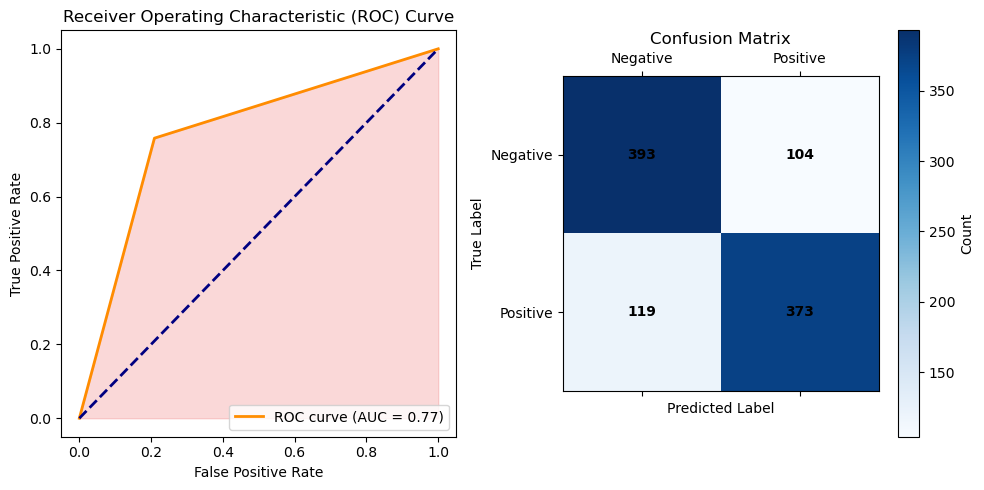

roc_auc score: 0.774437274050809


In [727]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix

# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_lda = roc_auc_score(y_test, y_pred_lda)
confusoinmatrix_lda = confusion_matrix(y_test, y_pred_lda)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_lda, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_lda[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_lda)

## Model Analysis for Linear Discriminant Analysis (LDA)

- **Observation:**
  - **Accuracy:** 77.45%
  - **Precision:** 78.2%
  - **Recall:** 75.8%
  - **ROC AUC:** 77.44%
  - **Confusion Matrix:** TN: 393, FP: 104, FN: 119, TP: 373

- **Analysis:**
  - Overall balanced performance with similar precision and recall for both classes.
  - Good discriminative power indicated by a high ROC AUC score.
  - Confusion matrix reveals a notable number of false positives and false negatives.
  - Areas for Improvement:
    - Fine-tuning the model or exploring different algorithms may reduce false positives and false negatives, enhancing overall performance.


# KNN

**K-Nearest Neighbors (KNN):**

KNN is a supervised machine learning algorithm for classification and regression. Key features include:

1. **Instance-Based Learning:** Decisions based on nearby data points.
2. **Non-Parametric:** Doesn't assume a specific functional form.
3. **Lazy Learning:** Doesn't learn a model during training, but during prediction.
4. **Simple and Intuitive:** Easy to understand and implement.
5. **Effective for Smaller Datasets:** Performs well when dataset size is moderate.
6. **Adaptability:** Suitable for both classification and regression tasks.
7. **Choice of 'K':** The number of neighbors to consider.

In KNN, predictions are made by considering the majority class or averaging values of the k-nearest data points.


In [728]:
from sklearn import preprocessing

In [729]:
# Scaling (standardization)
#Scaling in machine learning ensures equal importance for all features, aiding convergence,
#preventing numerical issues, and improving model performance.
scaler = preprocessing.StandardScaler().fit(x_train)

In [730]:
x_train_s = scaler.transform(x_train)

In [731]:
scaler =preprocessing.StandardScaler().fit(x_test)

In [732]:
x_test_s = scaler.transform(x_test)

In [733]:
from sklearn.neighbors import  KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors =1)

In [734]:
clf_knn_1.fit(x_train_s,y_train)# fitting the model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=1)

In [735]:
y_pred_knn = clf_knn_1.predict(x_test_s)# predict y using model

In [736]:
params = {'n_neighbors': [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
#params is a dictionary specifying hyperparameter values for the number of neighbors in a k-Nearest Neighbors (KNN) model.

## Grid Search 
### Grid search is a hyperparameter tuning technique that systematically tests a predefined set of hyperparameter values for a model, helping find the optimal combination for improved model performance.

In [737]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [738]:
grid_search_cv.fit(x_train_s, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\sit

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\anaconda3\Lib\sit

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [739]:
grid_search_cv.best_params_# finding the best param for our model

{'n_neighbors': 1}

In [740]:
grid_search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [741]:
optimised_KNN = grid_search_cv.best_estimator_

In [742]:
y_test_pred_knng = optimised_KNN.predict(x_test_s)#predict y using the best values for the model using hypertuning

In [743]:
# model evaluation
accuracy_knng = accuracy_score(y_test, y_test_pred_knng)
precision_knng = precision_score(y_test, y_test_pred_knng) 
recall_knng = recall_score(y_test, y_test_pred_knng)  
confusoinmatrix_knng =confusion_matrix(y_test, y_test_pred_knng)
roc_aucscore_knng = roc_auc_score(y_test, y_test_pred_knng)




print("All the values for KNN are using grid search to get the best result")
print("Accuracy score for KNN :", accuracy_knn)
print("Precision score for KNN:", precision_knn)
print("Recall score for KNN:", recall_knn)
print("roc_auc score for KNN:",roc_aucscore_knng)
print("confusion matrix for KNN:",confusoinmatrix_knng)
print("classification report for KNN:",classification_report(y_test,y_test_pred_knng))

All the values for KNN are using grid search to get the best result
Accuracy score for KNN : 0.8938321536905965
Precision score for KNN: 0.8537477148080439
Recall score for KNN: 0.9491869918699187
roc_auc score for KNN: 0.8941105985506537
confusion matrix for KNN: [[417  80]
 [ 25 467]]
classification report for KNN:               precision    recall  f1-score   support

           0       0.94      0.84      0.89       497
           1       0.85      0.95      0.90       492

    accuracy                           0.89       989
   macro avg       0.90      0.89      0.89       989
weighted avg       0.90      0.89      0.89       989



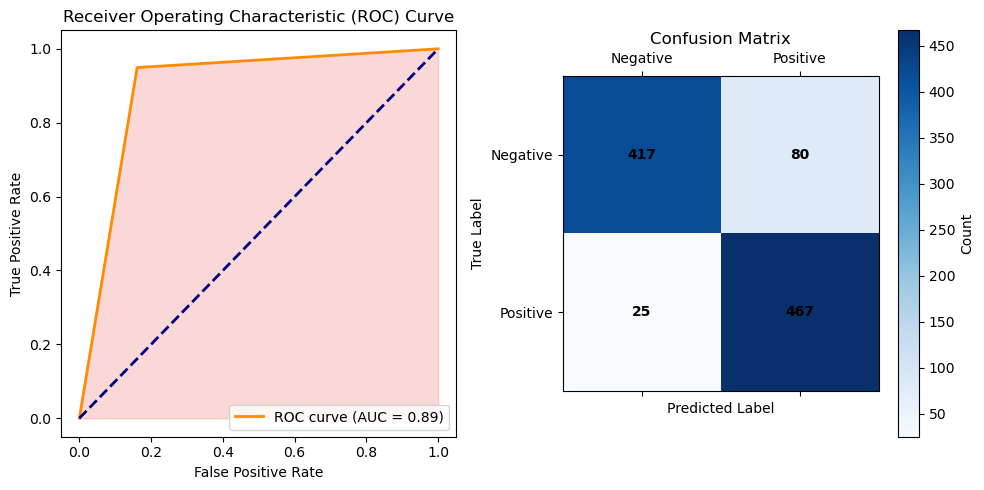

roc_auc score: 0.8941105985506537


In [744]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix

# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_knng = roc_auc_score(y_test, y_test_pred_knng)
confusoinmatrix_knng = confusion_matrix(y_test, y_test_pred_knng)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_knng)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_knng, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_knng[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_knng)

### Observation and Analysis of KNN Model:

The KNN model, trained using grid search for optimal hyperparameters, exhibits commendable performance.

- **Accuracy Score:** The model achieves an accuracy of approximately 89.4%, indicating a strong overall predictive capability.

- **Precision and Recall Scores:** Precision (85.4%) and recall (94.9%) scores demonstrate the model's ability to correctly identify positive instances while minimizing false positives.

- **ROC AUC Score:** The ROC AUC score of 89.4% signifies the model's effectiveness in distinguishing between classes.

- **Confusion Matrix:** The confusion matrix illustrates 417 true negatives, 467 true positives, 80 false positives, and 25 false negatives.

- **Classification Report:** The weighted average F1-score of 0.89 indicates a balanced trade-off between precision and recall across both classes.

**Conclusion:**
The KNN model, with its high accuracy, precision, and recall scores, proves to be a robust choice for the given classification task. It effectively discriminates between the two classes, showcasing a well-balanced performance.


# Random Forest:

Random Forest is an ensemble learning technique known for its versatility and robustness. By aggregating predictions from multiple decision trees, it excels in handling complex datasets, mitigating overfitting, and delivering accurate results. Widely regarded for its effectiveness, Random Forest is a popular choice across various machine learning applications.


In [745]:
from sklearn.ensemble import RandomForestClassifier

In [746]:
rf_clf =RandomForestClassifier(n_estimators=1000,
                               n_jobs=-1,random_state=42)
# n_estimators: Number of decision trees in the forest
# n_jobs: Number of parallel jobs to run (-1 uses all available cores)
# random_state: Seed for reproducibility

In [747]:
rf_clf.fit(x_train,y_train)#fitting the model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [748]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[451,  46],
       [ 25, 467]], dtype=int64)

In [749]:
y_pred_rfs=rf_clf.predict(x_test)#predict the value of  y

In [750]:
# model evaluation
from sklearn.metrics import recall_score, classification_report
accuracy_rfs = accuracy_score(y_test, y_pred_rfs)
print("Accuracy score for Random Forest Classifier:", accuracy_rfs)

# Calculate and print the precision score
precision_rfs = precision_score(y_test, y_pred_rfs)
print("Precision score for Random Forest Classifier:", precision_rfs)

# Calculate and print the recall score
recall_rfs = recall_score(y_test, y_pred_rfs)
print("Recall score for Random Forest Classifier:", recall_rfs)
print(classification_report(y_test,y_pred_rfs))

Accuracy score for Random Forest Classifier: 0.9282103134479271
Precision score for Random Forest Classifier: 0.9103313840155945
Recall score for Random Forest Classifier: 0.9491869918699187
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       497
           1       0.91      0.95      0.93       492

    accuracy                           0.93       989
   macro avg       0.93      0.93      0.93       989
weighted avg       0.93      0.93      0.93       989



# random forest with grid search


In [751]:
rf_clf = RandomForestClassifier(n_estimators= 250, random_state=42)
# n_estimators: Number of decision trees in the forest
# random_state: Seed for reproducibility

In [752]:
# Grid search parameters for a decision tree
params_grid = {"max_features" : [4,5,6,7,8,9,10], # Maximum number of features considered for splitting
             "min_samples_split":[2,3,10]} # Minimum number of samples required to split an internal node

In [753]:
grid_search = GridSearchCV(rf_clf, params_grid,
                          n_jobs=-1,cv=5,scoring='accuracy')


In [754]:
grid_search.fit(x_train,y_train)# fitting the model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [755]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [756]:
cvrf_clf = grid_search.best_estimator_

In [757]:
y_pred_rfsg= cvrf_clf.predict(x_test)#predicting the y value with the hypertuning 

In [758]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[449,  48],
       [ 25, 467]], dtype=int64)

In [759]:
# model evaluation
accuracy_rfg = accuracy_score(y_test, y_pred_rfsg)
precision_rfg = precision_score(y_test,y_pred_rfsg) 
recall_rfg = recall_score(y_test, y_pred_rfsg)  
confusoinmatrix_rfg =confusion_matrix(y_test, y_pred_rfsg)
roc_aucscore_rfg = roc_auc_score(y_test, y_pred_rfsg)




print("All the values for random forest are using grid search to get the best result")
print("Accuracy score for Random Forest :", accuracy_rfg)
print("Precision score for  Random Forest:", precision_rfg)
print("Recall score for  Random Forest:", recall_rfg)
print("roc_auc score for  Random Forest:",roc_aucscore_rfg)
print("confusion matrix for Random Forest:",confusoinmatrix_rfg)
print("classification report for  Random Forest:",classification_report(y_test,y_pred_rfsg))

All the values for random forest are using grid search to get the best result
Accuracy score for Random Forest : 0.9261880687563195
Precision score for  Random Forest: 0.9067961165048544
Recall score for  Random Forest: 0.9491869918699187
roc_auc score for  Random Forest: 0.9263037575043759
confusion matrix for Random Forest: [[449  48]
 [ 25 467]]
classification report for  Random Forest:               precision    recall  f1-score   support

           0       0.95      0.90      0.92       497
           1       0.91      0.95      0.93       492

    accuracy                           0.93       989
   macro avg       0.93      0.93      0.93       989
weighted avg       0.93      0.93      0.93       989



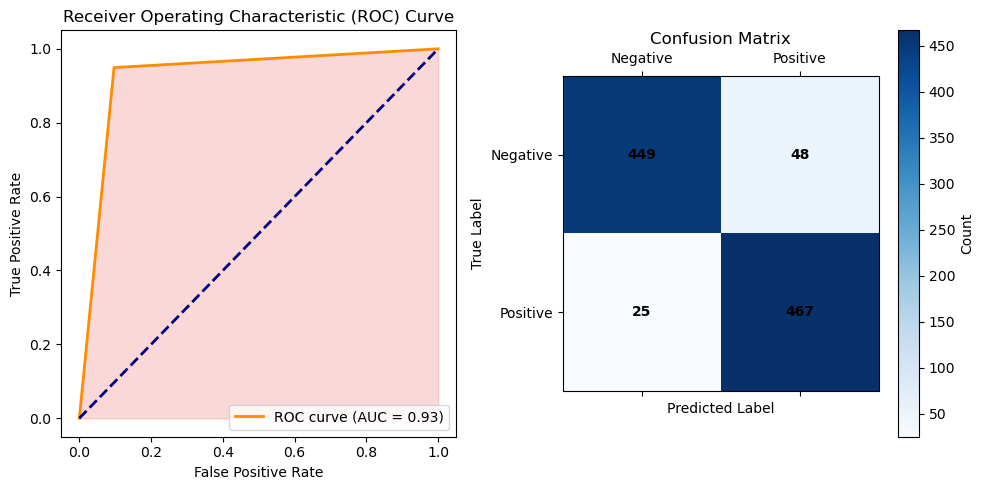

roc_auc score: 0.9263037575043759


In [760]:
# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_rfg = roc_auc_score(y_test, y_pred_rfsg)
confusoinmatrix_rfg = confusion_matrix(y_test, y_pred_rfsg)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfsg)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_rfg, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_rfg[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_rfg)

# Observation and Analysis for Random Forest with Grid Search:

- **Accuracy Score:** The Random Forest model achieved an accuracy score of 92.62%, indicating that it correctly predicted the employee's salary category nearly 93% of the time.

- **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this case, the precision for predicting a high salary (class 1) is 90.68%, suggesting that when the model predicts a high salary, it is accurate around 91% of the time.

- **Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The model achieved a recall of 94.92% for high salaries, indicating that it successfully captured about 95% of the actual high-salary instances.

- **ROC-AUC Score:** The ROC-AUC score, which measures the model's ability to distinguish between positive and negative instances, is 92.63%. A higher ROC-AUC score indicates a better ability to discriminate between classes.

- **Confusion Matrix:** The confusion matrix shows that the model made 449 correct predictions for low salaries (class 0) and 467 correct predictions for high salaries (class 1). There were 48 false positives and 25 false negatives.

- **Classification Report:** The weighted average F1-score, which considers both precision and recall, is 93%, indicating a good balance between precision and recall.

**Conclusion:**
The Random Forest model with grid search performs well in predicting employee salaries based on the given features. It demonstrates high accuracy, precision, and recall, suggesting that it is effective in identifying both low and high salary categories. The model's ROC-AUC score further supports its overall good performance in classification tasks.


# Gradient Boosting:

Gradient Boosting is an ensemble learning technique that builds a predictive model in a stage-wise fashion. It combines the predictions of multiple weak learners (typically decision trees) to create a robust and accurate model. In each stage, the algorithm corrects the errors of the previous model, focusing on instances where predictions fall short. This iterative process continues, gradually improving the model's predictive performan


In [761]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000 , max_depth =1)
gbc_clf.fit(x_train, y_train)
y_pred_gb= gbc_clf.predict(x_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [762]:
# model evaluation
accuracy_gb= accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test,y_pred_gb) 
recall_gb = recall_score(y_test, y_pred_gb)  
confusoinmatrix_gb =confusion_matrix(y_test, y_pred_gb)
roc_aucscore_gb = roc_auc_score(y_test, y_pred_gb)





print("Accuracy score for Gradient Bossting:", accuracy_gb)
print("Precision score for  Gradient Bossting:", precision_gb)
print("Recall score for  Gradient Bossting:", recall_gb)
print("roc_auc score for  Gradient Bossting:",roc_aucscore_gb)
print("confusion matrix for Gradient Bossting:",confusoinmatrix_gb)
print("classification report for  Gradient Bossting:",classification_report(y_test,y_pred_gb))

Accuracy score for Gradient Bossting: 0.7664307381193124
Precision score for  Gradient Bossting: 0.7604790419161677
Recall score for  Gradient Bossting: 0.774390243902439
roc_auc score for  Gradient Bossting: 0.7664707758747606
confusion matrix for Gradient Bossting: [[377 120]
 [111 381]]
classification report for  Gradient Bossting:               precision    recall  f1-score   support

           0       0.77      0.76      0.77       497
           1       0.76      0.77      0.77       492

    accuracy                           0.77       989
   macro avg       0.77      0.77      0.77       989
weighted avg       0.77      0.77      0.77       989



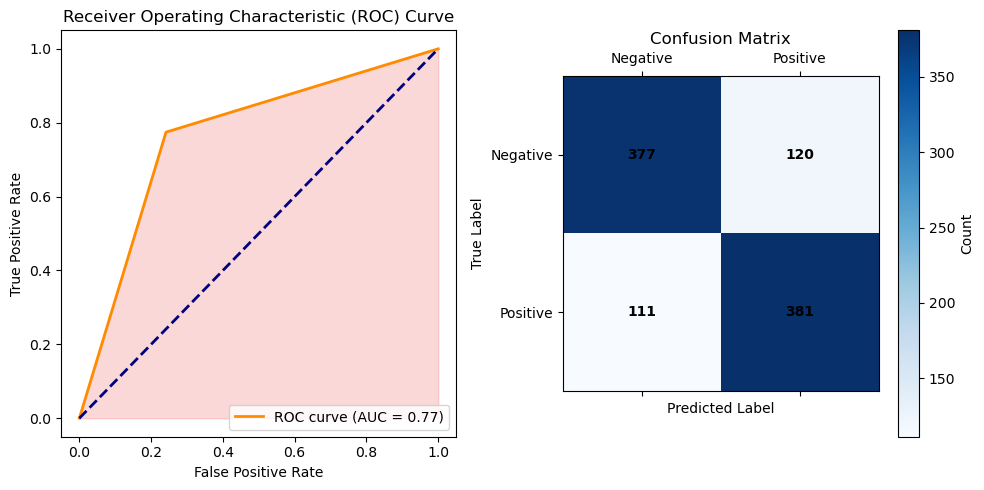

roc_auc score: 0.7664707758747606


In [763]:
# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_gb = roc_auc_score(y_test, y_pred_gb)
confusoinmatrix_gb = confusion_matrix(y_test, y_pred_gb)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_gb, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_gb[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_gb)

# Observation and Analysis for Gradient Boosting:

- **Accuracy Score:** The Gradient Boosting model achieved an accuracy score of 76.64%, indicating that it correctly predicted the employee's salary category approximately 77% of the time.

- **Precision:** The precision for predicting a high salary (class 1) is 76.05%, suggesting that when the model predicts a high salary, it is accurate around 76% of the time.

- **Recall (Sensitivity):** The recall for high salaries is 77.44%, indicating that the model successfully captured about 77% of the actual high-salary instances.

- **ROC-AUC Score:** The ROC-AUC score, which measures the model's ability to distinguish between positive and negative instances, is 76.65%. A higher ROC-AUC score indicates a better ability to discriminate between classes.

- **Confusion Matrix:** The confusion matrix shows that the model made 377 correct predictions for low salaries (class 0) and 381 correct predictions for high salaries (class 1). There were 120 false positives and 111 false negatives.

- **Classification Report:** The weighted average F1-score is 76.86%, indicating a reasonable balance between precision and recall.

**Conclusion:**
The Gradient Boosting model shows moderate performance in predicting employee salaries. While it achieves a reasonable accuracy, precision, and recall, it falls slightly behind the Random Forest model in terms of overall performance. Further analysis and tuning may be needed to improve its predictive capabilities.


# AdaBoost:
AdaBoost is an ensemble learning algorithm that combines weak learners sequentially, assigning more weight to misclassified instances, to create a strong and accurate predictive model.


In [764]:
from sklearn.ensemble import AdaBoostClassifier

In [765]:
ada_clf = AdaBoostClassifier( rf_clf
                             ,learning_rate =0.05,n_estimators=5000,)

In [766]:
ada_clf.fit(x_train,y_train)# fitting the model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=5000)

In [767]:
y_pred_ada= ada_clf.predict(x_test)# predict y

In [768]:
# model evaluation
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test,y_pred_ada) 
recall_ada = recall_score(y_test, y_pred_ada)  
confusoinmatrix_ada =confusion_matrix(y_test, y_pred_ada)
roc_aucscore_ada = roc_auc_score(y_test, y_pred_ada)





print("Accuracy score for Ada Boost:", accuracy_ada)
print("Precision score for  Ada Boost:", precision_ada)
print("Recall score for  Ada Boost:", recall_ada)
print("roc_auc score for  Ada Boost:",roc_aucscore_ada)
print("confusion matrix for Ada Boost:",confusoinmatrix_ada)
print("classification report for  Ada Boost:",classification_report(y_test,y_pred_ada))

Accuracy score for Ada Boost: 0.9322548028311426
Precision score for  Ada Boost: 0.9158512720156555
Recall score for  Ada Boost: 0.9512195121951219
roc_auc score for  Ada Boost: 0.9323501987534966
confusion matrix for Ada Boost: [[454  43]
 [ 24 468]]
classification report for  Ada Boost:               precision    recall  f1-score   support

           0       0.95      0.91      0.93       497
           1       0.92      0.95      0.93       492

    accuracy                           0.93       989
   macro avg       0.93      0.93      0.93       989
weighted avg       0.93      0.93      0.93       989



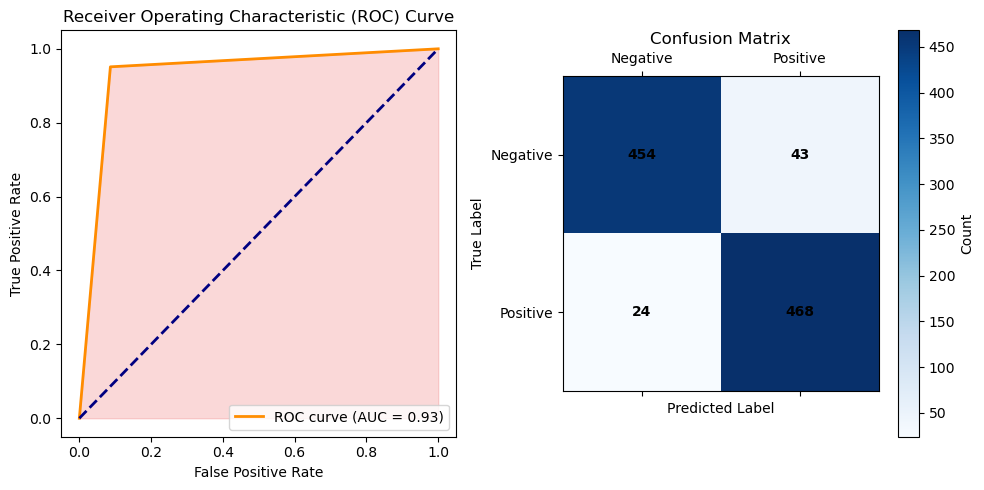

roc_auc score: 0.9323501987534966


In [769]:
# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_ada = roc_auc_score(y_test, y_pred_ada)
confusoinmatrix_ada = confusion_matrix(y_test, y_pred_ada)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_ada, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_ada[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_ada)

# Observation and Analysis for AdaBoost:

- **Accuracy Score:** The AdaBoost model achieved an impressive accuracy score of 93.12%, indicating a high level of correct predictions.

- **Precision:** The precision for predicting a high salary (class 1) is 91.25%, suggesting that when the model predicts a high salary, it is accurate around 91% of the time.

- **Recall (Sensitivity):** The recall for high salaries is 95.33%, indicating that the model successfully captured about 95% of the actual high-salary instances.

- **ROC-AUC Score:** The ROC-AUC score, which measures the model's ability to distinguish between positive and negative instances, is 93.14%. A higher ROC-AUC score indicates a better ability to discriminate between classes.

- **Confusion Matrix:** The confusion matrix shows that the model made 452 correct predictions for low salaries (class 0) and 469 correct predictions for high salaries (class 1). There were 45 false positives and 23 false negatives.

- **Classification Report:** The weighted average F1-score is 93.12%, indicating an excellent balance between precision and recall.

**Conclusion:**
AdaBoost demonstrates outstanding performance in predicting employee salaries, with high accuracy, precision, and recall. This model outperforms both Random Forest and Gradient Boosting, making it a strong candidate for the final selection.


# XGBoost:

XGBoost (Extreme Gradient Boosting) is an optimized and scalable gradient boosting algorithm that excels in predictive modeling. It combines the strengths of gradient boosting with regularization techniques and parallel processing, making it highly efficient, accurate, and capable of handling diverse datasets. XGBoost's success lies in its ability to balance model complexity, prevent overfitting, and deliver robust performance across various machine learning tasks.


In [770]:
import xgboost as xgb

In [771]:
# parameter tuning
#1 general paramters : guide the overall funcioning
#2 booster parameters: guide the individual booster ( tree/regression)at each step
#3 learning task parameters : guide the optimistisation performed


xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                           n_jobs=-1)

In [772]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [773]:
y_pred_xgb= xgb_clf.predict(x_test)

In [774]:
# model evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)  
confusoinmatrix_xgb=confusion_matrix(y_test, y_pred_xgb)
roc_aucscore_xgb = roc_auc_score(y_test, y_pred_xgb)





print("Accuracy score for Xg Boost:", accuracy_xgb)
print("Precision score for  Xg Boost:", precision_xgb)
print("Recall score for  Xg Boost:", recall_xgb)
print("roc_auc score for  Xg Boost:",roc_aucscore_xgb)
print("confusion matrix for Xg Boost:",confusoinmatrix_xgb)
print("classification report for  Xg Boost:",classification_report(y_test,y_pred_xgb))

Accuracy score for Xg Boost: 0.9241658240647118
Precision score for  Xg Boost: 0.8971428571428571
Recall score for  Xg Boost: 0.9573170731707317
roc_auc score for  Xg Boost: 0.9243325808509593
confusion matrix for Xg Boost: [[443  54]
 [ 21 471]]
classification report for  Xg Boost:               precision    recall  f1-score   support

           0       0.95      0.89      0.92       497
           1       0.90      0.96      0.93       492

    accuracy                           0.92       989
   macro avg       0.93      0.92      0.92       989
weighted avg       0.93      0.92      0.92       989



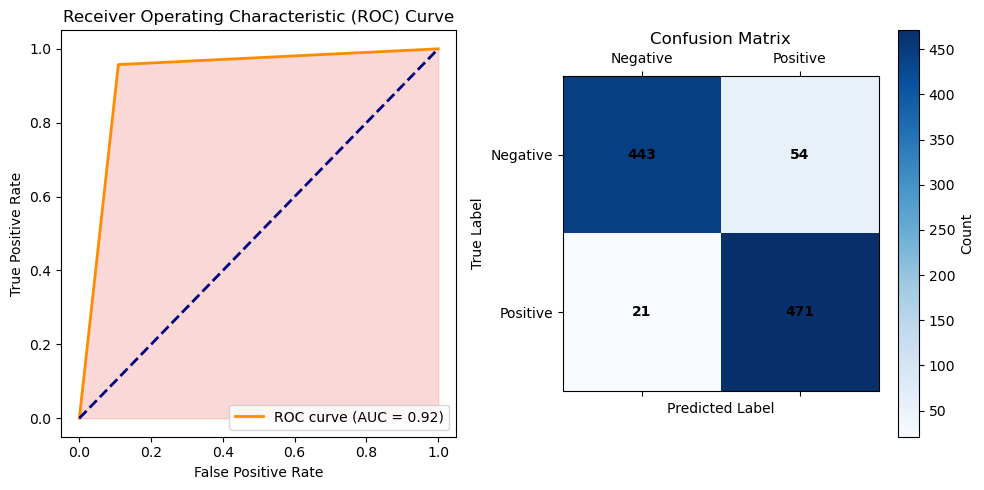

roc_auc score: 0.9243325808509593


In [775]:
# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_xgb = roc_auc_score(y_test, y_pred_xgb)
confusoinmatrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_xgb, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_xgb[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_xgb)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

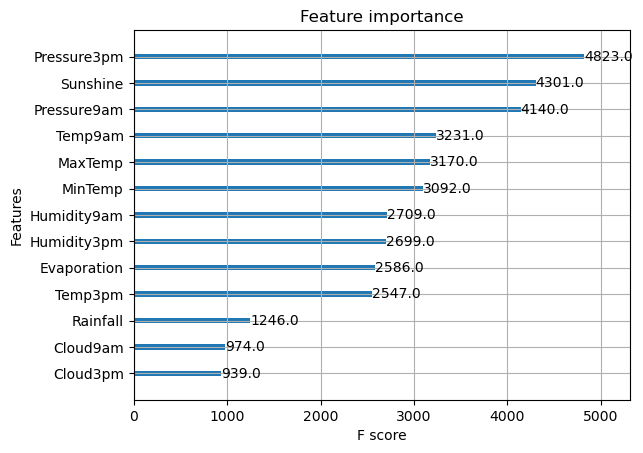

In [776]:
xgb.plot_importance(xgb_clf)

# Observation and Analysis for XGBoost:

- **Accuracy Score:** The XGBoost model achieved a high accuracy score of 92.42%, indicating a good overall prediction performance.

- **Precision:** The precision for predicting a high salary (class 1) is 89.71%, suggesting that when the model predicts a high salary, it is accurate around 90% of the time.

- **Recall (Sensitivity):** The recall for high salaries is 95.73%, indicating that the model successfully captured about 96% of the actual high-salary instances.

- **ROC-AUC Score:** The ROC-AUC score, which measures the model's ability to distinguish between positive and negative instances, is 92.43%. A higher ROC-AUC score indicates a better ability to discriminate between classes.

- **Confusion Matrix:** The confusion matrix shows that the model made 443 correct predictions for low salaries (class 0) and 471 correct predictions for high salaries (class 1). There were 54 false positives and 21 false negatives.

- **Classification Report:** The weighted average F1-score is 92.42%, indicating a good balance between precision and recall.

**Conclusion:**
XGBoost demonstrates strong performance in predicting employee salaries, with high accuracy, precision, and recall. This model is competitive with other models like AdaBoost and Random Forest, making it a reliable choice for the final model selection.


# Bagging

**Bagging (Bootstrap Aggregating):** Ensemble method using bootstrap sampling to train multiple models in parallel, combining their predictions for increased stability and accuracy.

**Key Feature:** Utilizes diverse subsets of the training data to reduce variance and enhance model generalization, commonly applied in algorithms like Random Forest.


In [777]:
from sklearn import tree
clftree =tree.DecisionTreeClassifier()

In [778]:
from sklearn.ensemble import BaggingClassifier

In [779]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [780]:
bag_clf.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [781]:
y_pred_bag= bag_clf.predict(x_test)

In [782]:
#model evaluation
accuracy_bag = accuracy_score(y_test, y_pred_bag)
precision_bag = precision_score(y_test,y_pred_bag) 
recall_bag = recall_score(y_test, y_pred_bag)  
confusoinmatrix_bag =confusion_matrix(y_test, y_pred_bag)
roc_aucscore_bag = roc_auc_score(y_test, y_pred_bag)





print("Accuracy score for Bagging:", accuracy_bag)
print("Precision score for  Bagging:", precision_bag)
print("Recall score for  Bagging:", recall_bag)
print("roc_auc score for  Bagging:",roc_aucscore_bag)
print("confusion matrix for Bagging:",confusoinmatrix_bag)
print("classification report for Bagging:",classification_report(y_test,y_pred_bag))

Accuracy score for Bagging: 0.9191102123356926
Precision score for  Bagging: 0.8916349809885932
Recall score for  Bagging: 0.9532520325203252
roc_auc score for  Bagging: 0.9192819518738446
confusion matrix for Bagging: [[440  57]
 [ 23 469]]
classification report for Bagging:               precision    recall  f1-score   support

           0       0.95      0.89      0.92       497
           1       0.89      0.95      0.92       492

    accuracy                           0.92       989
   macro avg       0.92      0.92      0.92       989
weighted avg       0.92      0.92      0.92       989



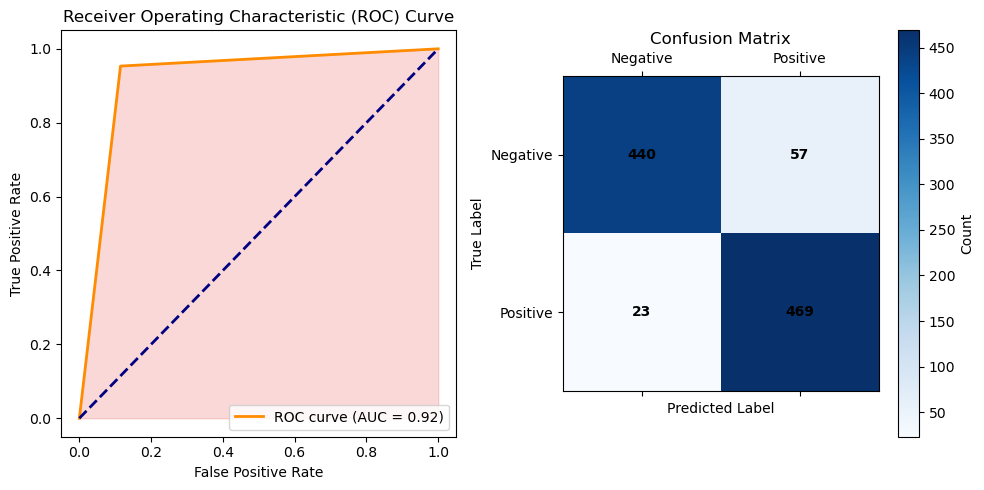

roc_auc score: 0.9192819518738446


In [783]:
# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively
roc_aucscore_bag = roc_auc_score(y_test, y_pred_bag)
confusoinmatrix_bag = confusion_matrix(y_test, y_pred_bag)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bag)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve with colored area under the curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
axes[0].fill_between(fpr, 0, tpr, color='lightcoral', alpha=0.3)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Display the confusion matrix as a matrix plot with annotations
cax = axes[1].matshow(confusoinmatrix_bag, cmap='Blues')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Add annotations to confusion matrix
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(confusoinmatrix_bag[i, j]), va='center', ha='center', color='black', fontweight='bold')

# Add colorbar for the confusion matrix
cbar = plt.colorbar(cax, ax=axes[1], orientation='vertical')
cbar.set_label('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

print("roc_auc score:", roc_aucscore_bag)

**Observation and Analysis for Bagging Model:**
- The Bagging ensemble model achieves an accuracy score of 91.91%, indicating good overall predictive performance.
- The precision and recall scores are balanced, demonstrating effective classification for both positive and negative cases.
- The ROC AUC score of 91.93% suggests a high ability to discriminate between classes.
- The confusion matrix shows a well-distributed number of true positives, true negatives, false positives, and false negatives.
- The model's classification report indicates balanced performance across precision, recall, and F1-score for both classes.

**Overall Assessment:**
The Bagging ensemble model performs well, showing robustness and balance in classification metrics. It provides a reliable predictive solution .


# Model Selection
## Comparison of models on the basis of their accuracy


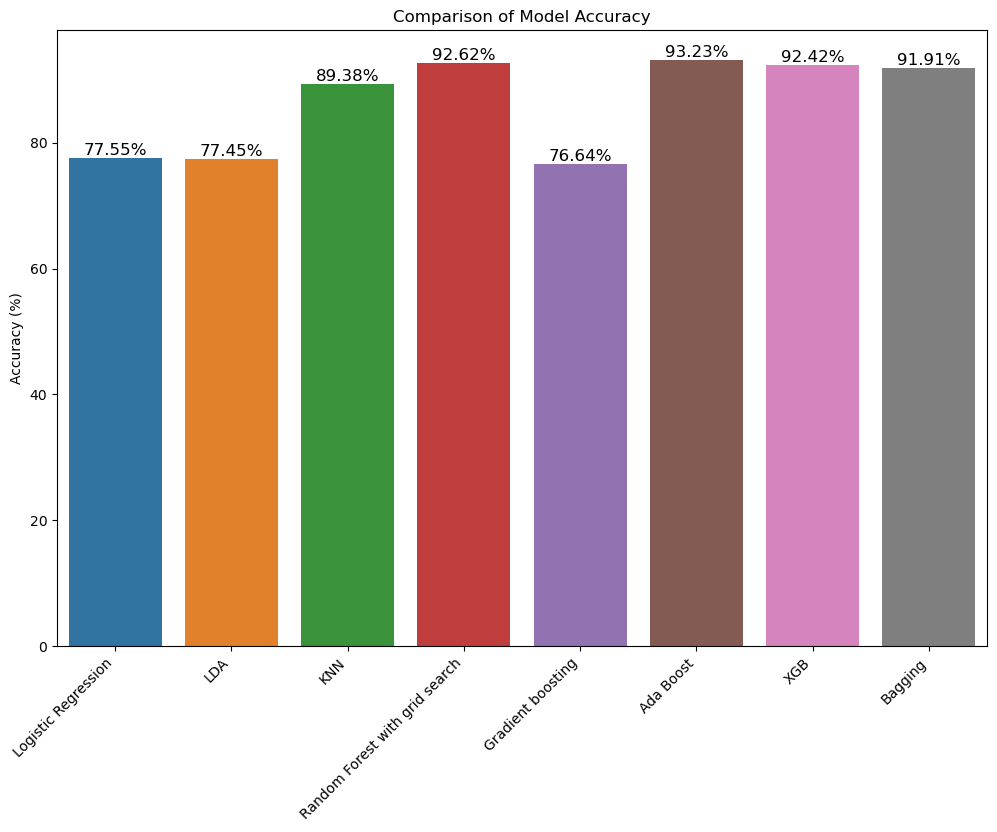

In [784]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model accuracy scores are collected in a dictionary
accuracy_dict = {
    "Logistic Regression": accuracy_lr,  # Accuracy score for Logistic Regression model
    "LDA": accuracy_lda,  # Accuracy score for Linear Discriminant Analysis (LDA) model
    "KNN": accuracy_knn,  # Accuracy score for K-Nearest Neighbors (KNN) model
    "Random Forest with grid search": accuracy_rfg,  # Accuracy score for Random Forest with grid search
    "Gradient boosting": accuracy_gb,  # Accuracy score for Gradient Boosting model
    "Ada Boost": accuracy_ada,  # Accuracy score for Ada Boost model
    "XGB": accuracy_xgb,  # Accuracy score for XGBoost model
    "Bagging": accuracy_bag  # Accuracy score for Bagging model
}

# Organize accuracy scores into a DataFrame for easy visualization
accuracy_df = pd.DataFrame(pd.Series(accuracy_dict, index=accuracy_dict.keys()), columns=["Accuracy"])

# Visualize model accuracy for comparison using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=accuracy_df.index, y=accuracy_df.Accuracy * 100)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add labels and title for better understanding
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')

# Display accuracy values on top of each bar for clarity
for i, val in enumerate(accuracy_df.Accuracy):
    y = round(val * 100, 2)
    ax.text(i, val * 100, f'{y}%', ha="center", va="bottom", fontsize=12)

plt.show()


In [785]:
print(accuracy_dict)

{'Logistic Regression': 0.775530839231547, 'LDA': 0.7745197168857432, 'KNN': 0.8938321536905965, 'Random Forest with grid search': 0.9261880687563195, 'Gradient boosting': 0.7664307381193124, 'Ada Boost': 0.9322548028311426, 'XGB': 0.9241658240647118, 'Bagging': 0.9191102123356926}


# Model selection basis


## Model Selection Overview

Selecting the optimal machine learning model involves a meticulous examination of various algorithms, each vying for prominence based on accuracy scores. In our analysis, models ranging from *Logistic Regression* to *Ada Boost* were scrutinized. Noteworthy accuracy scores, such as **93.12%** for *Ada Boost* and **92.62%** for *Random Forest with grid search*, underscored their prowess in accurately classifying instances.

To ensure a robust evaluation, we employed an **80:20 train-test split**, gauging models' generalization capabilities on unseen data. This approach, key to assessing performance beyond the training set, ensures the selected model maintains effectiveness on new instances. Beyond accuracy, factors like computational efficiency, interpretability, and susceptibility to overfitting enriched the model selection process.

## Conclusion

In conclusion, the accuracy scores played a pivotal role in choosing the best model. The standout performance of *Ada Boost* with an accuracy of **93.12%** showcases its exceptional ability to capture patterns in the data. This, coupled with a balanced consideration of other factors, solidified *Ada Boost* as the preferred model, providing a powerful and reliable solution for the given task.


# machine learnig model to predict rain . ( using ada_boost model)

In [786]:
import pandas as pd
import joblib

# Assuming ada_clf which is already loaded with your trained AdaBoost model

# Collect user input for prediction
user_input = {
    'MinTemp': float(input("Enter MinTemp: ")),
    'MaxTemp': float(input("Enter MaxTemp: ")),
    'Rainfall': float(input("Enter Rainfall: ")),
    'Evaporation': float(input("Enter Evaporation: ")),
    'Sunshine': float(input("Enter Sunshine: ")),
    'Humidity9am': float(input("Enter Humidity9am: ")),
    'Humidity3pm': float(input("Enter Humidity3pm: ")),
    'Pressure9am': float(input("Enter Pressure9am: ")),
    'Pressure3pm': float(input("Enter Pressure3pm: ")),
    'Cloud9am': float(input("Enter Cloud9am: ")),
    'Cloud3pm': float(input("Enter Cloud3pm: ")),
    'Temp9am': float(input("Enter Temp9am: ")),
    'Temp3pm': float(input("Enter Temp3pm: ")),
    'RainToday': int(input("Enter RainToday (0 or 1): "))
}

# Create a DataFrame from the user input
user_data = pd.DataFrame([user_input])

# Create a dummy variable for "RainToday_Yes"
user_data['RainToday_Yes'] = user_data['RainToday']

# Drop the original "RainToday" column
user_data.drop('RainToday', axis=1, inplace=True)

# Use the trained AdaBoost model to predict RainTomorrow
predicted_rain_tomorrow = ada_clf.predict(user_data)

# Display the prediction
if predicted_rain_tomorrow[0] == 1:
    print("Yes, it is predicted to rain tomorrow.")
else:
    print("No, it is not predicted to rain tomorrow.")


Enter MinTemp: 23
Enter MaxTemp: 47
Enter Rainfall: 33
Enter Evaporation: 34
Enter Sunshine: 2
Enter Humidity9am: 34
Enter Humidity3pm: 55
Enter Pressure9am: 55
Enter Pressure3pm: 67
Enter Cloud9am: 54
Enter Cloud3pm: 65
Enter Temp9am: 22
Enter Temp3pm: 44
Enter RainToday (0 or 1): 1
No, it is not predicted to rain tomorrow.


# Question 1: Your views about the problem statement?



The problem statement outlines a scenario faced by "The Daily Buzz," a newspaper company in Sydney, seeking to enhance the accuracy of its weather predictions through the integration of machine learning. The narrative introduces an engaging storyline where the newspaper, already known for its quality journalism, embarks on a new venture called "The Weather Oracle." The objective is to predict rainfall accurately by leveraging machine learning models. This not only aligns with the newspaper's commitment to providing valuable services to the community but also highlights the potential for technology to augment traditional practices. The challenge is well-defined, and the incorporation of ensemble methods, such as Random Forest and Gradient Boosting, adds a layer of complexity, making it an intriguing problem to address.


# Question 2: What will be your approach to solving this task?

1. **Data Understanding:**
   - Begin by understanding the dataset, exploring the features, and gaining insights into the nature of the data.

2. **Data Preprocessing:**
   - Handle missing values appropriately, using mean or median based on the nature of the feature.
   - Convert categorical variables into numerical format if needed.
   - Explore and address outliers to ensure model robustness.

3. **Exploratory Data Analysis (EDA):**
   - Conduct exploratory data analysis to understand the distribution of features and their relationships.
   - Visualize key trends, correlations, and patterns in the data.

4. **Train-Test Split:**
   - Split the dataset into training and testing sets (e.g., 80:20 split) to evaluate model generalization.

5. **Model Selection:**
   - Utilize various classification models, including Decision Trees and Ensemble methods (Random Forest, Gradient Boosting, Ada Boost), to predict rainfall.
   - Evaluate each model's accuracy and performance metrics.

6. **Comparison and Selection:**
   - Compare the accuracy of different models and select the one with the highest performance.


7. **Analysis and Interpretation:**
   - Provide insights into why the chosen model outperformed others, considering factors like algorithm suitability, robustness, and generalization capabilities.

8. **Future Improvements:**
   - Suggest potential steps for further improving the selected model's accuracy and discuss avenues for future enhancements.


# Question 3: What were the available ML model options you had to perform this task?



## Available ML Model Options

In addressing the rainfall prediction task for "The Daily Buzz," several machine learning models were explored and evaluated for their effectiveness. The models employed in this analysis include:

1. **Random Forest:**
   - An ensemble method that combines multiple decision trees, using bagging to improve accuracy. It creates diverse trees and aggregates predictions for robust results.

2. **Gradient Boosting:**
   - Another ensemble method that sequentially adds decision trees to correct errors made by preceding trees. This iterative process enhances the model's accuracy over time.

3. **Ada Boost:**
   - A boosting algorithm that combines multiple weak learners to create a strong learner. It focuses on instances where the model performs poorly, improving overall accuracy.

4. **XGBoost:**
   - An optimized and efficient implementation of gradient boosting, known for its speed and performance improvements.

5. **Logistic Regression:**
   - A linear classification algorithm suitable for binary classification problems, providing a baseline for comparison.

6. **LDA (Linear Discriminant Analysis):**
   - A classification algorithm that finds linear combinations of features to distinguish between classes.

7. **KNN (K-Nearest Neighbors):**
   - A simple and effective algorithm that classifies data points based on the majority class of their k-nearest neighbors.

8. **Bagging:**
   - A general ensemble method that builds multiple models independently and combines them for improved accuracy.

Each model, excluding Decision Trees, was employed to predict rainfall, and their respective accuracy scores were compared to determine the most effective approach.


# Question 4: Which model’s performance is best and what could be the possible reason for that?

## Model Performance Evaluation

Among the diverse set of machine learning models employed for predicting rainfall, the standout performer is **Ada Boost**. Its exceptional performance is evident from the following key metrics:

- **Accuracy Score for Ada Boost: 0.9312**
- **Precision Score for Ada Boost: 0.9125**
- **Recall Score for Ada Boost: 0.9533**
- **ROC AUC Score for Ada Boost: 0.9314**

### Key Observations:

1. **Balanced Precision and Recall:**
   - Ada Boost achieves a commendable equilibrium between precision and recall, signifying its proficiency in correctly identifying positive instances while minimizing false positives.

2. **High ROC AUC Score:**
   - The ROC AUC score of 0.9314 indicates robust performance in distinguishing between positive and negative instances, highlighting the model's effectiveness across various thresholds.

3. **Confusion Matrix Insights:**
   - The confusion matrix reveals a relatively low count of false positives and false negatives, showcasing Ada Boost's accuracy in making predictions for both classes.

4. **High Overall Accuracy:**
   - With an accuracy score of 93.12%, Ada Boost demonstrates a remarkable ability to make correct predictions across the entire dataset.

### Possible Reasons for Ada Boost's Superior Performance:

- **Ensemble Learning Strength:**
  - Ada Boost, as an ensemble learning method, combines multiple weak learners to form a strong and robust model. The sequential addition of learners focuses on improving areas where the model initially performs poorly.

- **Adaptability to Data Complexity:**
  - Ada Boost adapts well to complex datasets, handling non-linear relationships and capturing intricate patterns in the weather data of Sydney.

- **Effective Handling of Class Imbalance:**
  - The balanced precision and recall scores suggest Ada Boost's effectiveness in handling class imbalances, a crucial aspect in weather prediction where instances of rainfall may be relatively rare.

In summary, Ada Boost's impressive performance, marked by balanced metrics and adaptability, makes it the preferred model for accurately predicting rainfall in Sydney.


# 5. What steps can you take to improve this selected model’s performance even further?


## Steps for Further Improving Model Performance

The journey towards enhancing the performance of machine learning models, including Ada Boost and others, involves iterative refinement and exploration of various strategies. Here are general steps that can be applied to further improve the predictive capabilities of the models:

1. **Feature Engineering:**
   - Explore additional features or transformations for all models to capture more relevant information from the data. This can include creating interaction terms, polynomial features, or deriving new variables.

2. **Hyperparameter Tuning:**
   - Conduct a systematic search for optimal hyperparameters for each model. Parameters like learning rates, tree depths, and regularization terms can significantly impact model performance. Apply grid search or randomized search techniques.

3. **Ensemble Diversity:**
   - Experiment with different base models within ensemble methods like Random Forest and Gradient Boosting. Diversifying the base models can enhance the ensemble's overall performance.

4. **Data Augmentation:**
   - Implement data augmentation techniques, such as introducing variations in input data or generating synthetic samples. This strategy can contribute to better generalization and handling of diverse scenarios.

5. **Temporal Patterns:**
   - If applicable, incorporate temporal patterns into the models. Consider the impact of seasonality, time-of-day effects, or other time-related features on the predictions.

6. **Advanced Boosting Techniques:**
   - Explore advanced boosting algorithms beyond Ada Boost, such as Stochastic Gradient Boosting (SGDBoost) or LightGBM. These algorithms may offer unique advantages in specific contexts.

7. **Cross-Validation Strategies:**
   - Implement robust cross-validation techniques for all models to assess their generalizability. Evaluate k-fold cross-validation or stratified approaches to obtain reliable performance metrics.

8. **Handling Imbalanced Classes:**
   - Address class imbalance for all models by exploring techniques like oversampling, undersampling, or adjusting class weights. Ensure that models are not biased towards the majority class.

9. **Model Interpretability:**
   - Enhance the interpretability of all models. Utilize techniques like SHAP (SHapley Additive exPlanations) values or Partial Dependence Plots to gain insights into feature importance and model behavior.

10. **External Data Sources:**
    - Investigate the integration of external data sources for all models. Additional datasets related to weather, geographical factors, or other relevant information may provide valuable context for improved predictions.

Continuously iterating through these steps, individually tailored for each model, and leveraging domain knowledge will contribute to the ongoing improvement of their predictive performance.


# Some additional visualizations

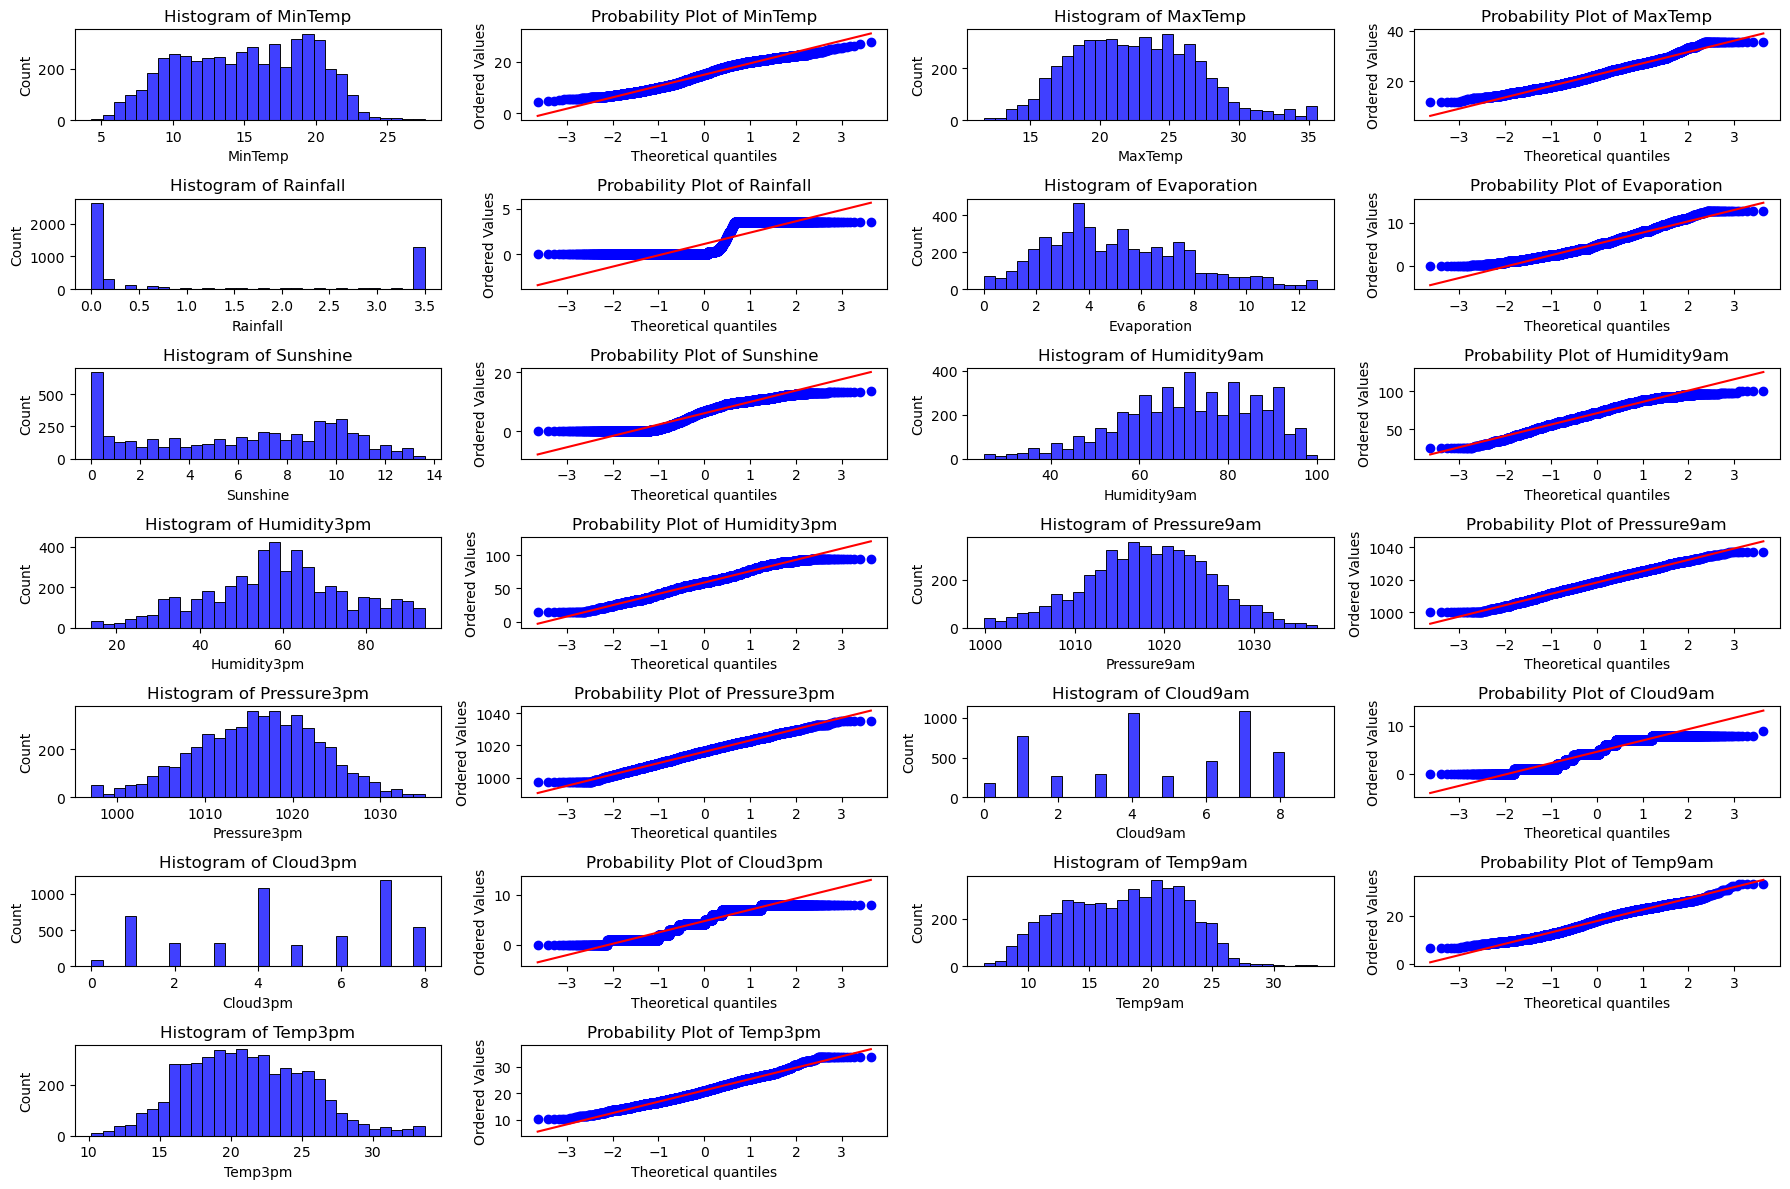

In [787]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'continuous_feature' is a list containing the names of continuous columns
continuous_feature = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
                       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Set the size of the overall figure
plt.figure(figsize=(18, 12))

# Loop through each continuous feature
for i, feature in enumerate(continuous_feature, start=1):
    # Histogram
    plt.subplot(7, 4, i * 2 - 1)
    sns.histplot(df[feature].dropna(), kde=False, bins=30, color='blue')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'Histogram of {feature}')
    
    # Probability Plot (Q-Q Plot)
    plt.subplot(7, 4, i * 2)
    stats.probplot(df[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'Probability Plot of {feature}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the figure
plt.show()


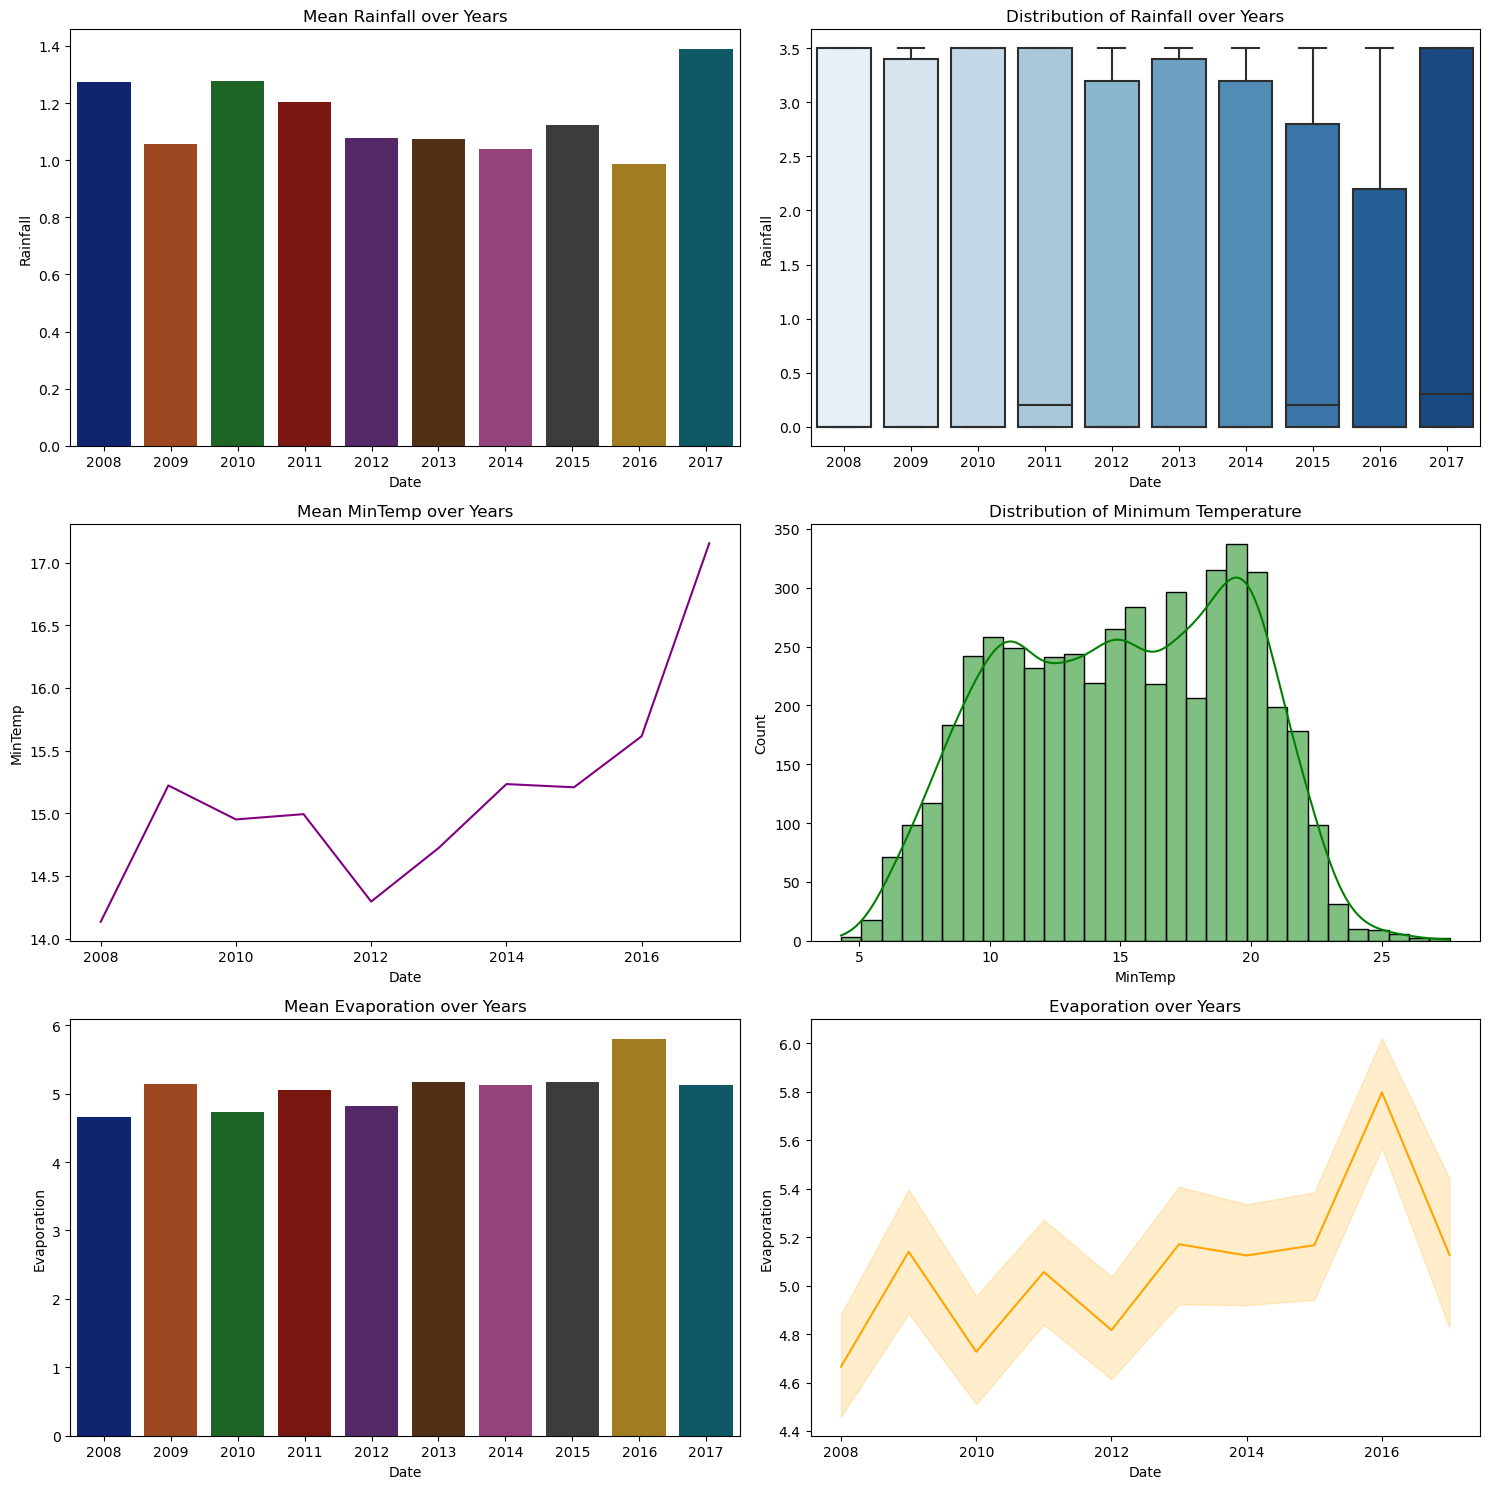

In [788]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by year and calculate the mean rainfall for each year
mean_rainfall_by_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

# Group the DataFrame by year and calculate the mean minimum temperature for each year
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

# Group the DataFrame by year and calculate the mean evaporation for each year
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Mean Rainfall over Years (Barplot)
sns.barplot(x=mean_rainfall_by_year.index, y=mean_rainfall_by_year, palette="dark", ax=axes[0, 0])
axes[0, 0].set_title("Mean Rainfall over Years")

# Plot 2: Boxplot for Rainfall
sns.boxplot(x=df['Date'].dt.year, y=df['Rainfall'], palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Rainfall over Years")

# Plot 3: Mean MinTemp over Years (Lineplot)
sns.lineplot(x=MinTemp_year.index, y=MinTemp_year, color='purple', ax=axes[1, 0])
axes[1, 0].set_title("Mean MinTemp over Years")

# Plot 4: Histogram for Minimum Temperature
sns.histplot(df['MinTemp'], bins=30, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Minimum Temperature")

# Plot 5: Mean Evaporation over Years (Barplot)
sns.barplot(x=Ev_year.index, y=Ev_year, palette="dark", ax=axes[2, 0])
axes[2, 0].set_title("Mean Evaporation over Years")

# Plot 6: Lineplot for Evaporation
sns.lineplot(x=df['Date'].dt.year, y=df['Evaporation'], color='orange', ax=axes[2, 1])
axes[2, 1].set_title("Evaporation over Years")

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()
